In [1]:
# scikit learn (python library) will help to build a Naive Bayes model 
# in Python.  There are three types of Naive Bayes model 
# under scikit learn library:

# 1> Gaussian : Used in classification and assumes that features 
#               follow a normal distribution.
# 2> Multinomial (http://onlinestatbook.com/2/probability/multinomial.html)
# 3> Bernoulli (https://www.statisticshowto.com/bernoulli-distribution/)

# Below is the example of Gaussian model. We will be using GaussianNB only.

# Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

# assigning predictor and target variables
X = np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], 
             [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])

y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [2]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X, y)

#Predict Output 
predicted= model.predict([[10,20],[3,4]])
print(predicted)

[4 4]


In [3]:
# Import packages
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas.util.testing as tm

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if __name__ == '__main__':


In [4]:
# Import data
training = pd.read_csv("har_train.txt")
training.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [5]:
test =  pd.read_csv("har_validate.txt")
test.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
1,A,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,...,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0
2,A,1.42,8.21,-94.4,3,0.02,0.00,-0.02,-22,4,...,36,0.00,-0.02,-0.03,193,202,-214,-14,659.0,478.0
3,A,1.48,8.15,-94.4,3,0.00,0.00,0.00,-21,4,...,36,0.02,0.00,0.00,194,204,-215,-13,656.0,471.0
4,A,1.51,8.12,-94.4,3,0.00,0.00,-0.02,-21,4,...,36,0.02,-0.02,0.00,192,204,-213,-13,653.0,481.0


In [6]:
training.shape

(13737, 53)

In [7]:
test.shape

(5885, 53)

In [8]:
# Create the X and Y
## Data preparation step
xtrain = training.drop('classe', axis=1)
ytrain = training.loc[ : , 'classe']

xtest = test.drop('classe', axis=1)
ytest = test.loc[ : , 'classe']

In [9]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(xtrain, ytrain)

# Predict Output 
pred = model.predict(xtest)
print(pred[:5])

['A' 'A' 'A' 'A' 'A']


Text(83.40000000000006, 0.5, 'Predicted')

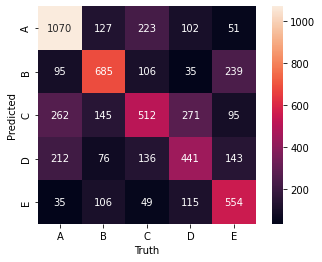

In [10]:
mat = confusion_matrix(pred, ytest)

names = np.unique(pred)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=names, yticklabels=names)

plt.xlabel('Truth')
plt.ylabel('Predicted')

## %d -> format specifier for int 

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(confusion_matrix(ytest, pred))  

print(classification_report(ytest, pred)) 

print(accuracy_score(ytest, pred))

[[1070   95  262  212   35]
 [ 127  685  145   76  106]
 [ 223  106  512  136   49]
 [ 102   35  271  441  115]
 [  51  239   95  143  554]]
              precision    recall  f1-score   support

           A       0.68      0.64      0.66      1674
           B       0.59      0.60      0.60      1139
           C       0.40      0.50      0.44      1026
           D       0.44      0.46      0.45       964
           E       0.64      0.51      0.57      1082

    accuracy                           0.55      5885
   macro avg       0.55      0.54      0.54      5885
weighted avg       0.57      0.55      0.56      5885

0.5542905692438402


In [ ]:
## Must refer : https://www.statisticshowto.com/multinomial-distribution/
## https://www.statisticshowto.com/bernoulli-distribution/

# Check on Multinominal Classifier
modelM = MultinomialNB()

# Train the model
modelM.fit(xtrain, ytrain)  ## Negative values are not allowed for a Multinomial distribution 

# Predict Output 
pred = modelM.predict(xtest)
print(pred[:5])

## https://stats.stackexchange.com/questions/169400/

In [13]:
# Check on Bernoulli Classifier
modelB = BernoulliNB()

# Train the model
modelB.fit(xtrain, ytrain) 

# Predict Output 
predB = modelB.predict(xtest)
print(predB[ : 5 ])

['A' 'A' 'A' 'A' 'A']


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(confusion_matrix(ytest, predB))  

print(classification_report(ytest, predB)) 

print(accuracy_score(ytest, predB))

[[1001  240  215  114  104]
 [ 253  486  126  112  162]
 [ 316  157  406   53   94]
 [  75  239  193  311  146]
 [ 116  210  183  157  416]]
              precision    recall  f1-score   support

           A       0.57      0.60      0.58      1674
           B       0.36      0.43      0.39      1139
           C       0.36      0.40      0.38      1026
           D       0.42      0.32      0.36       964
           E       0.45      0.38      0.42      1082

    accuracy                           0.45      5885
   macro avg       0.43      0.43      0.43      5885
weighted avg       0.45      0.45      0.44      5885

0.44519966015293116
